<a href="https://colab.research.google.com/github/bagascahyawiguna/DicodingBMLP/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Bagas_Cahyawiguna_(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   **Dataset yang digunakan**:
   https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tersebut belum memiliki label ataupun kelas.
   - **Jumlah Baris**: 2512 Baris.
   - **Tipe Data**: Mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: TransactionType, Location, Channel, CustomerOccupation.
     - *Numerikal*: TransactionAmount, AccountBalance, CustomerAge, TransactionDuration, LoginAttempts.
  - **Deskripsi Kolom**:
    - TransactionID: Pengidentifikasi alfanumerik unik untuk setiap transaksi.
    - AccountID: Pengidentifikasi unik untuk setiap akun, dengan beberapa transaksi per akun.
    - TransactionAmount: Nilai moneter setiap transaksi, mulai dari pengeluaran sehari-hari yang kecil hingga pembelian yang lebih besar.
    - TransactionDate: Cap waktu setiap transaksi, menangkap tanggal dan waktu.
    - TransactionType: Bidang kategoris yang menunjukkan transaksi 'Kredit' atau 'Debit'.
    - Location: Lokasi geografis transaksi, diwakili oleh nama kota di AS.
    - DeviceID: Pengidentifikasi alfanumerik untuk perangkat yang digunakan untuk melakukan transaksi.
    - IP Address: Alamat IPv4 yang dikaitkan dengan transaksi, dengan perubahan sesekali untuk beberapa akun.
    - MerchantID: Pengidentifikasi unik untuk pedagang, menampilkan pedagang pilihan dan pedagang pengecualian untuk setiap akun.
    - AccountBalance: Saldo dalam akun setelah transaksi, dengan korelasi logis berdasarkan jenis dan jumlah transaksi.
    - PreviousTransactionDate: Cap waktu transaksi terakhir untuk akun tersebut, membantu dalam menghitung frekuensi transaksi.
    - Channel: Saluran tempat transaksi dilakukan (misalnya, Online, ATM, Cabang).
    - CustomerAge: Usia pemegang akun, dengan pengelompokan logis berdasarkan pekerjaan.
    - CustomerOccupation: Pekerjaan pemegang akun (misalnya, Dokter, Insinyur, Mahasiswa, Pensiunan), yang mencerminkan pola pendapatan.
    - TransactionDuration: Durasi transaksi dalam hitungan detik, bervariasi berdasarkan jenis transaksi.
    - LoginAttempts: Jumlah upaya login sebelum transaksi, dengan nilai yang lebih tinggi menunjukkan potensi anomali.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
transactions_df = pd.read_csv('/content/drive/MyDrive/Dataset/bank_transactions_data_2.csv')
transactions_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Terdapat kesalahan tipe data di kolom "TransactionDate" dan "PreviousTransactionDate" yang seharusnya berupa "Date Time" bukan "Object"

In [ ]:
transactions_df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [ ]:
transactions_df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


Tidak ada missing value

In [ ]:
print("Jumlah duplikasi: ", transactions_df.duplicated().sum())

Jumlah duplikasi:  0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

##**Memahami Struktur Data**

###Menampilkan jumlah baris dan kolom

In [ ]:
print("Jumlah Baris dan Kolom:")
print(transactions_df.shape)

Jumlah Baris dan Kolom:
(2512, 16)


###Menampilkan informasi dataset

In [ ]:
print("\nInformasi Dataset:")
print(transactions_df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acco

In [ ]:
#Perbaikan Tipe Data pada Kolom Date
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['PreviousTransactionDate'] = pd.to_datetime(transactions_df['PreviousTransactionDate'])
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

###Menampilkan 5 baris pertama

In [ ]:
print("\n5 Baris Pertama Dataset:")
transactions_df.head()


5 Baris Pertama Dataset:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


##**Menangani Data yang Hilang**

###Mengecek missing values

In [ ]:
print("Missing Values per Kolom:")
print(transactions_df.isnull().sum())

Missing Values per Kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


Tidak ada missing value

##**Analisis Distribusi dan Korelasi**

###Statistik deskriptif untuk variabel numerik

In [ ]:
print("Statistik Deskriptif:")
transactions_df.describe()

Statistik Deskriptif:


,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN


###Visualisasi distribusi variabel numerik

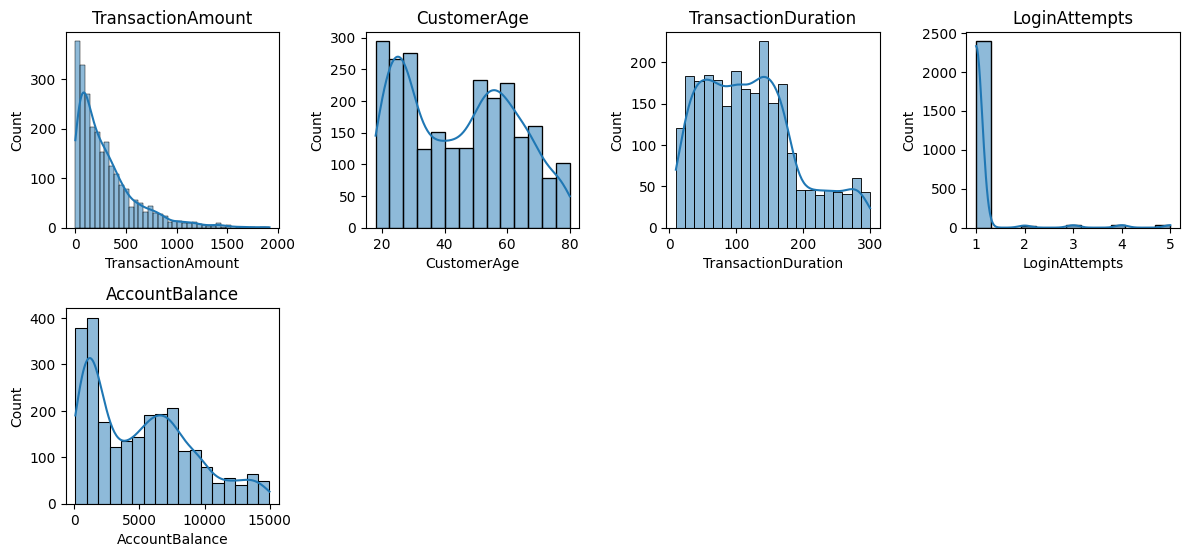

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(transactions_df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 4, i+1)
    sn.histplot(transactions_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

###Boxplot untuk mendeteksi outlier

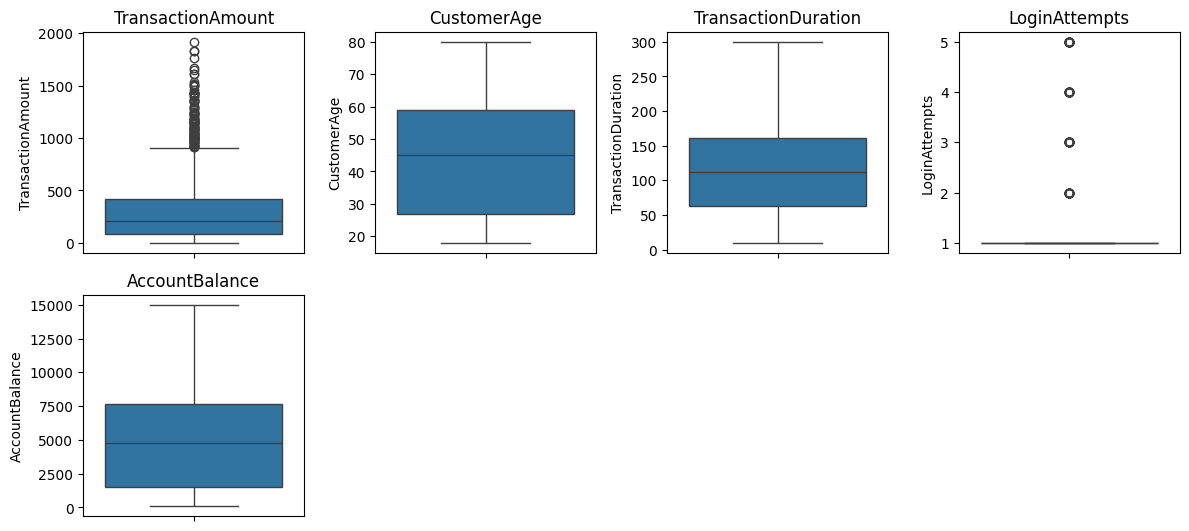

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(transactions_df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 4, i+1)
    sn.boxplot(y=transactions_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

###Matriks Korelasi

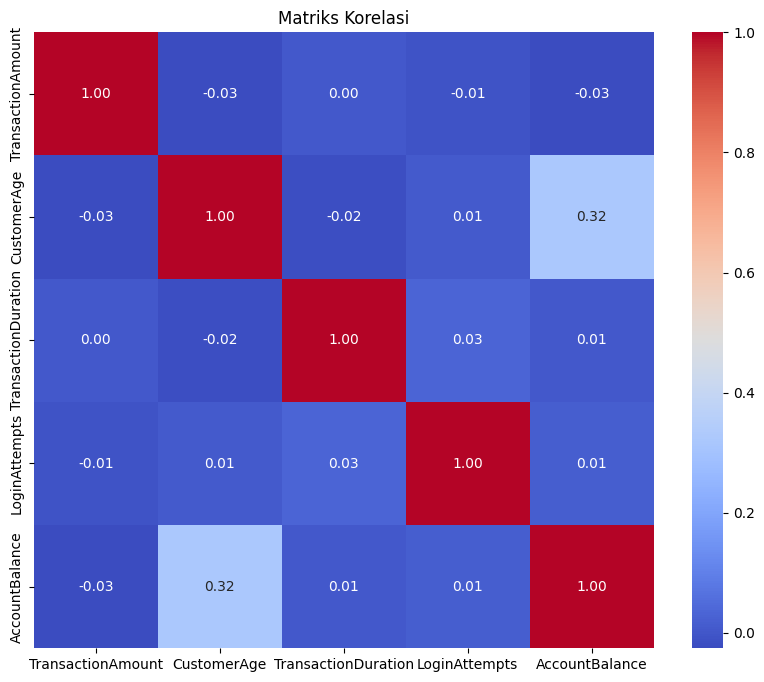

In [ ]:
correlation_matrix = transactions_df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

###Pengelompokkan Usia

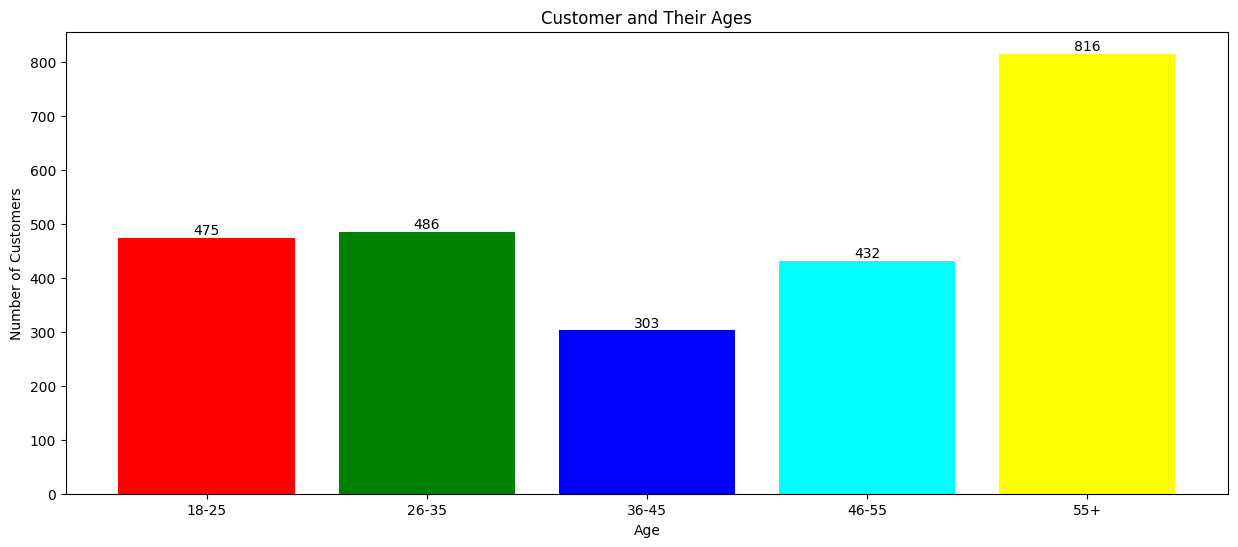

In [ ]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age18_25 = transactions_df.CustomerAge[(transactions_df.CustomerAge >= 18) & (transactions_df.CustomerAge <= 25)]
age26_35 = transactions_df.CustomerAge[(transactions_df.CustomerAge >= 26) & (transactions_df.CustomerAge <= 35)]
age36_45 = transactions_df.CustomerAge[(transactions_df.CustomerAge >= 36) & (transactions_df.CustomerAge <= 45)]
age46_55 = transactions_df.CustomerAge[(transactions_df.CustomerAge >= 46) & (transactions_df.CustomerAge <= 55)]
age55above = transactions_df.CustomerAge[transactions_df.CustomerAge >= 56]

# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

##**Visualisasi Data**

###Visualisasi variabel kategorik

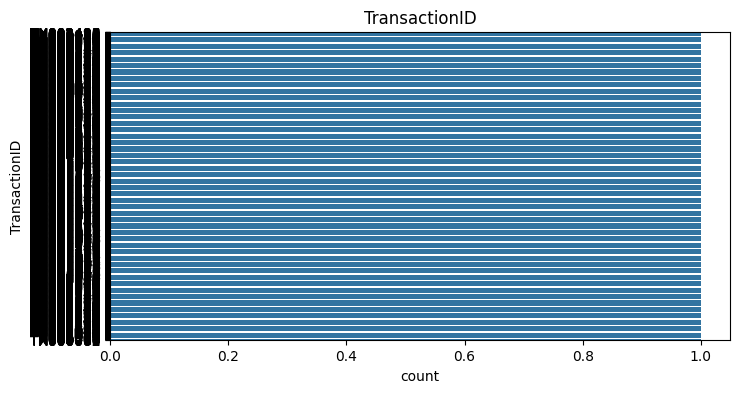

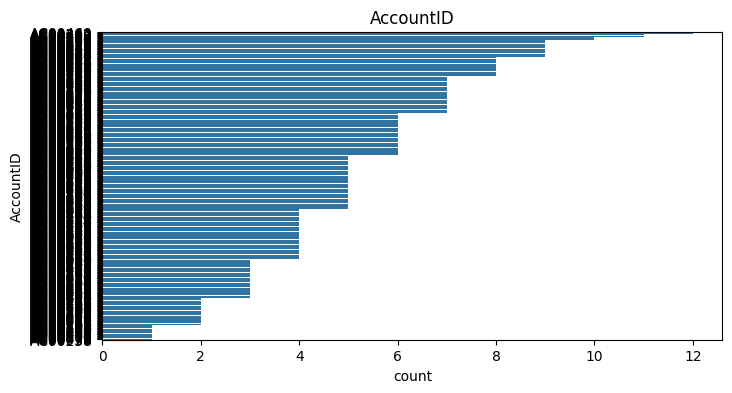

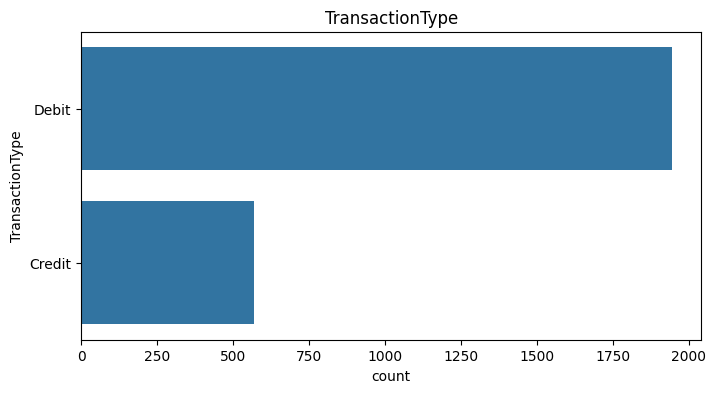

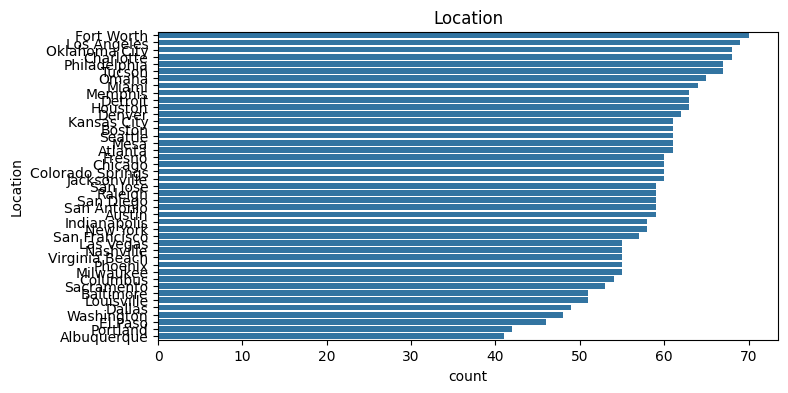

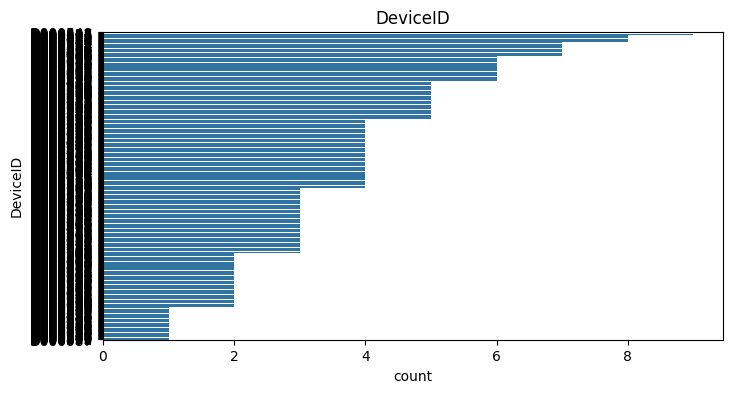

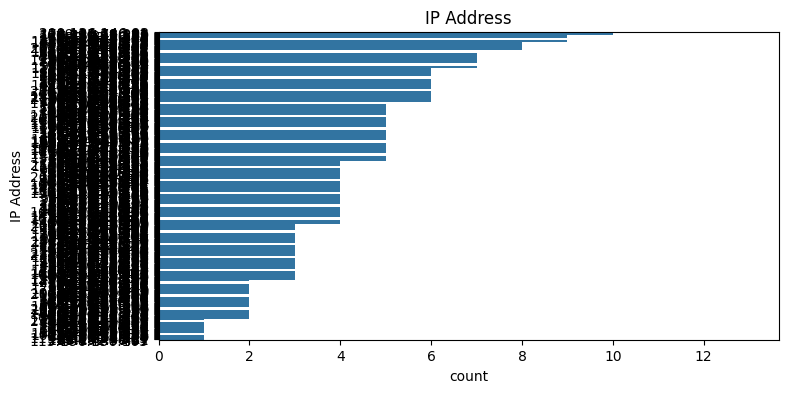

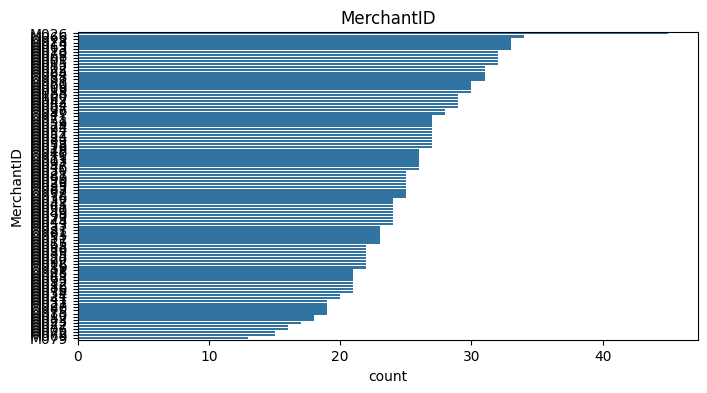

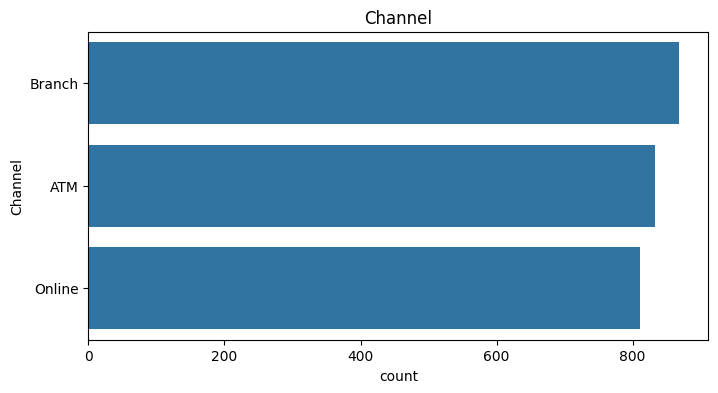

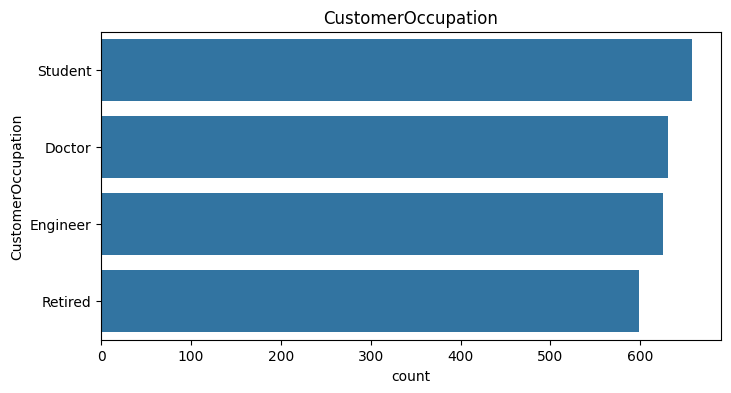

In [ ]:
for col in transactions_df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 4))
    sn.countplot(y=transactions_df[col], order=transactions_df[col].value_counts().index)
    plt.title(col)
    plt.show()

###Pairplot untuk variabel numerik

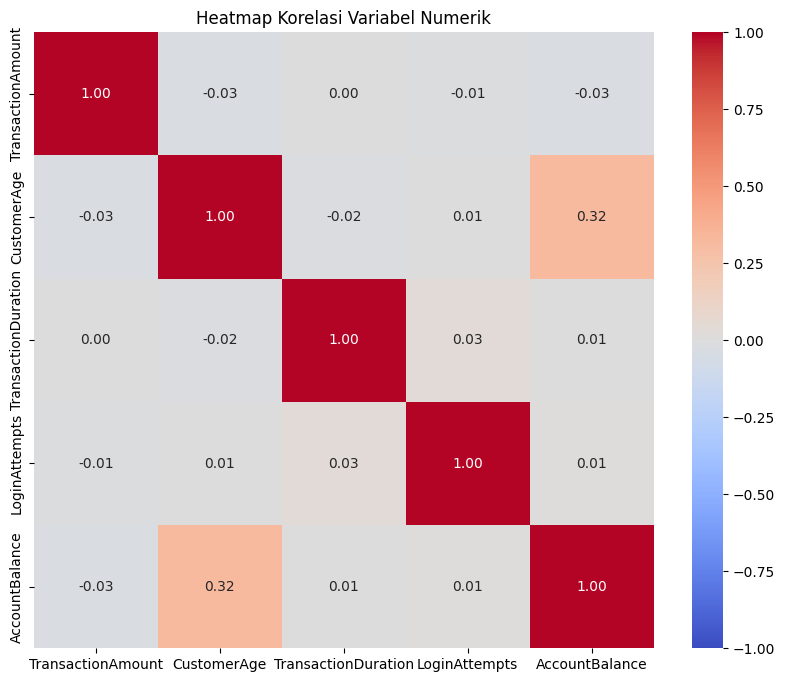

In [ ]:
# Pilih hanya kolom numerik
numerical_df = transactions_df.select_dtypes(include=['float64', 'int64'])

# Hitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

##**Normalisasi atau Standarisasi Fitur**

Sebelum Standarisasi:


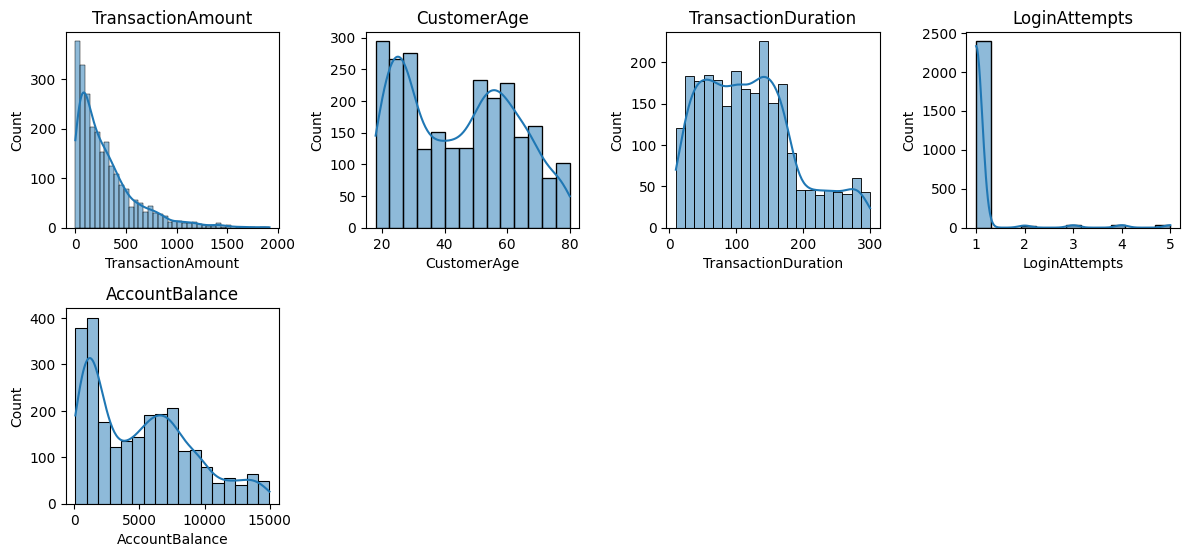

Setelah Standarisasi:


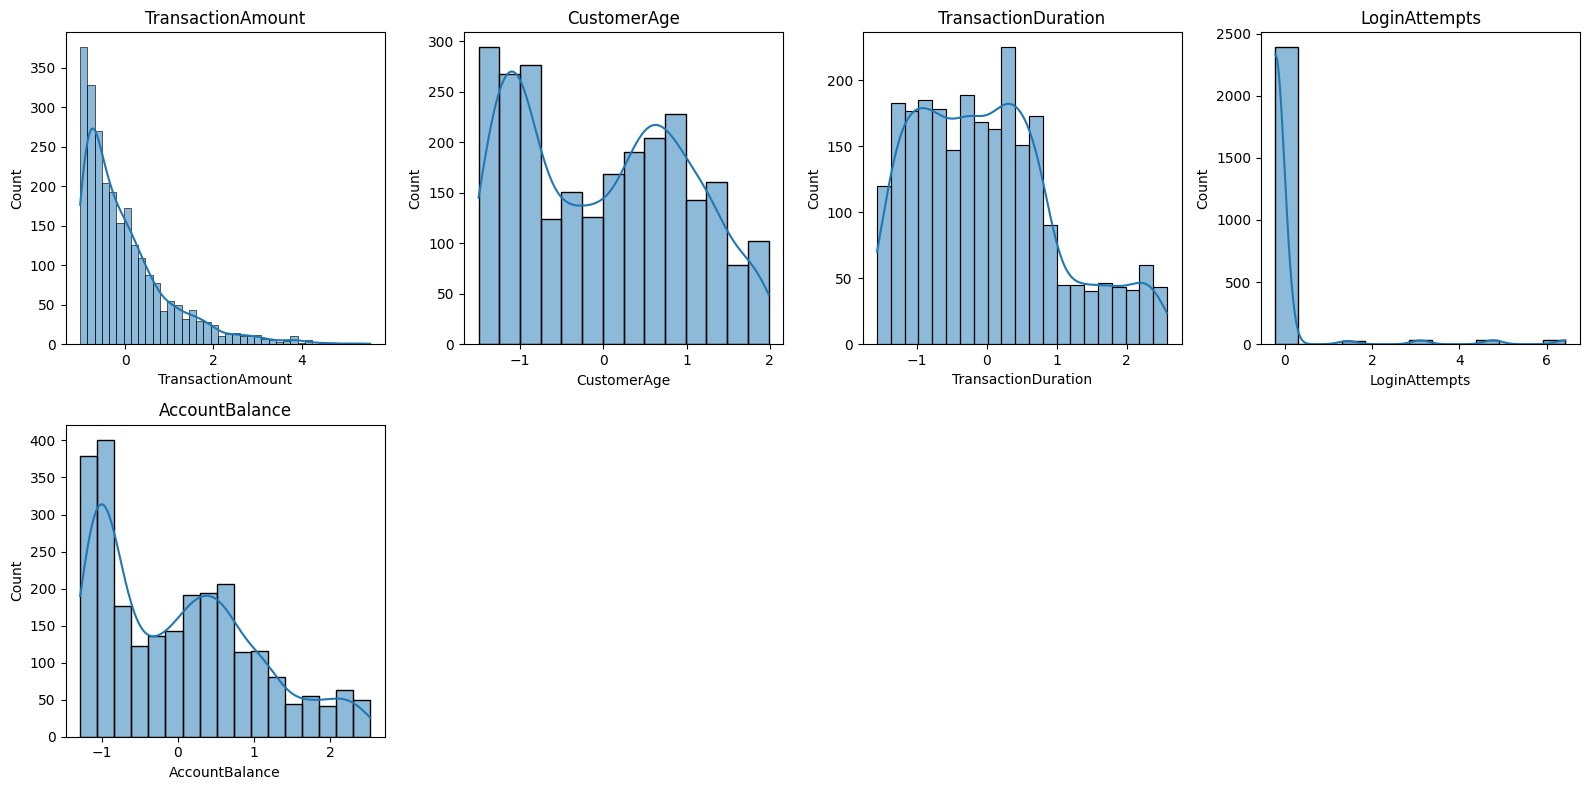

In [ ]:
scaler = StandardScaler()
df = transactions_df.copy()
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("Sebelum Standarisasi:")
plt.figure(figsize=(12, 8))
for i, col in enumerate(transactions_df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 4, i+1)
    sn.histplot(transactions_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

print("Setelah Standarisasi:")
n_cols = len(numeric_features)
n_rows = (n_cols // 4) + (1 if n_cols % 4 != 0 else 0)

plt.figure(figsize=(16, 4 * n_rows))
for i, col in enumerate(numeric_features):
    plt.subplot(n_rows, 4, i+1)
    sn.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
print("Sebelum Standarisasi:")
print(transactions_df[numeric_features].describe())

print("\nSetelah Standarisasi:")
print(df[numeric_features].describe())

Sebelum Standarisasi:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  

Setelah Standarisasi:
       TransactionAmount   CustomerAge  Trans

##**Deteksi dan Penanganan Outlier**

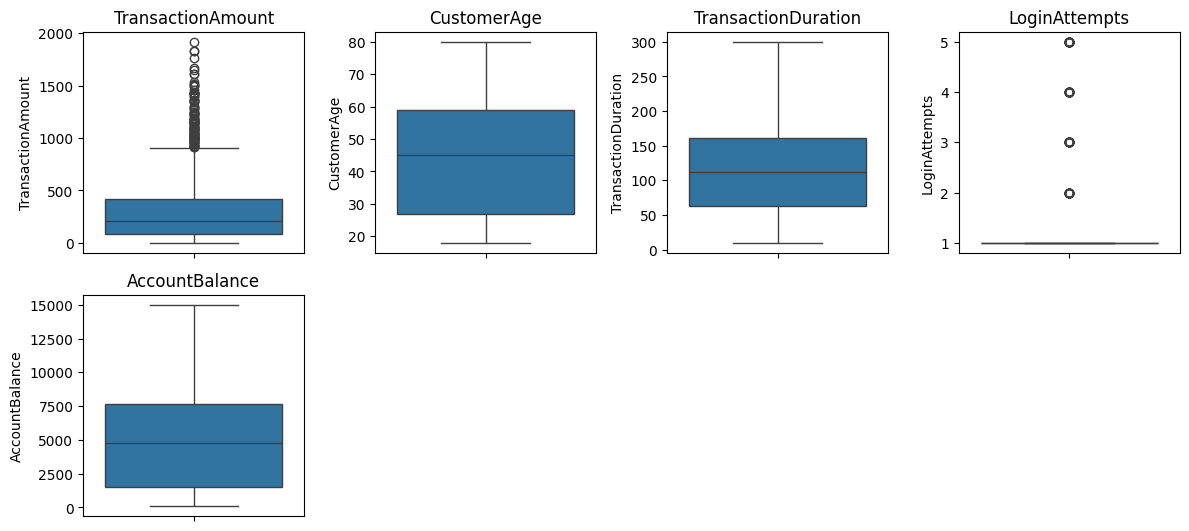

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df[numeric_features]):
    plt.subplot(3, 4, i+1)
    sn.boxplot(y=transactions_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Terdapat Outlier pada kolom TransactionAmount dan LoginAttempts. TransactionAmount memiliki outlier berkisar antara sekitar 900 hingga 1800 yang mana Box plot utama menunjukkan sebagian besar transaksi berada di bawah 500. Kemudian LoginAttempts erdapat beberapa outlier yang ditunjukkan dengan titik (nilai 2, 3, 4, dan 5), dimana hal tersebut menunjukkan adanya percobaan login lebih dari 1 kali. Data TransactionAmount memiliki outlier paling menonjol, yang mengindikasikan adanya transaksi dengan nilai yang jauh lebih tinggi dibandingkan transaksi normal. Pada LoginAttempts, outlier menunjukkan kasus di mana pengguna membutuhkan lebih dari satu kali percobaan untuk login. Sehingga, saya memilih untuk tidak perlu menghapus dan mengganti outlier tersebut karena bisa bermanfaat untuk mendeteksi anomali.

##**Encoding Data Kategorikal**

In [ ]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,TransactionID,AccountID,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation
0,TX000001,AC00128,Debit,San Diego,D000380,162.198.218.92,M015,ATM,Doctor
1,TX000002,AC00455,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor
2,TX000003,AC00019,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student
3,TX000004,AC00070,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student
4,TX000005,AC00411,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student
...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,Doctor
2508,TX002509,AC00322,Debit,Tucson,D000410,49.174.157.140,M029,Branch,Doctor
2509,TX002510,AC00095,Debit,San Diego,D000095,58.1.27.124,M087,Branch,Retired
2510,TX002511,AC00118,Debit,Denver,D000634,21.190.11.223,M041,Online,Student


###Menghapus Label yang tidak diperlukan

In [ ]:
#Menghapus label TransactionID
df.drop('TransactionID', axis=1, inplace=True)

###Label Encoding untuk AccountID, DeviceID, IP Address, dan MerchantID

In [ ]:
categorical_features = ['AccountID', 'Location', 'DeviceID', 'IP Address', 'MerchantID']

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

###Ekstrak Fitur dari TransactionDate dan PreviousTransactionDate

In [ ]:
# Ekstrak fitur baru
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek
df['Hour'] = df['TransactionDate'].dt.hour
df['Month'] = df['TransactionDate'].dt.month
df['DaysSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days

# Hapus kolom tanggal asli
df.drop(['TransactionDate', 'PreviousTransactionDate'], axis=1, inplace=True)

### One Hot Encoding TransactionType, Channel, dan CustomerOccupation

In [ ]:
onehot_columns = ['TransactionType', 'Channel', 'CustomerOccupation']
df = pd.get_dummies(df, columns=onehot_columns, drop_first=True)

###Dataset setelah diencoding

In [ ]:
df.head()

,AccountID,TransactionAmount,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,DayOfWeek,Hour,Month,DaysSinceLastTransaction,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,126,-0.971275,36,365,186,14,1.423718,-0.552443,-0.206794,-0.000537,1,16,4,-573,True,False,False,False,False,False
1,450,0.269440,15,50,82,51,1.311287,0.305314,-0.206794,2.216472,1,16,6,-496,True,False,False,False,False,False
2,18,-0.586882,23,229,343,8,-1.443277,-0.909842,-0.206794,-1.023534,0,18,7,-483,True,False,True,False,False,True
3,68,-0.387456,33,182,300,1,-1.049768,-1.353017,-0.206794,0.885797,4,16,5,-549,True,False,True,False,False,True
4,406,-0.973468,1,298,501,90,-1.049768,1.120184,-0.206794,0.593589,0,17,10,-385,False,False,True,False,False,True


##**Overview Data Preprocessing**

###Meninjau Missing Value

In [ ]:
# Menghitung jumlah dan persentase missing values di setiap kolom
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]  # Menampilkan kolom dengan missing values

,Missing Values,Percentage


###Meninjau Histogram

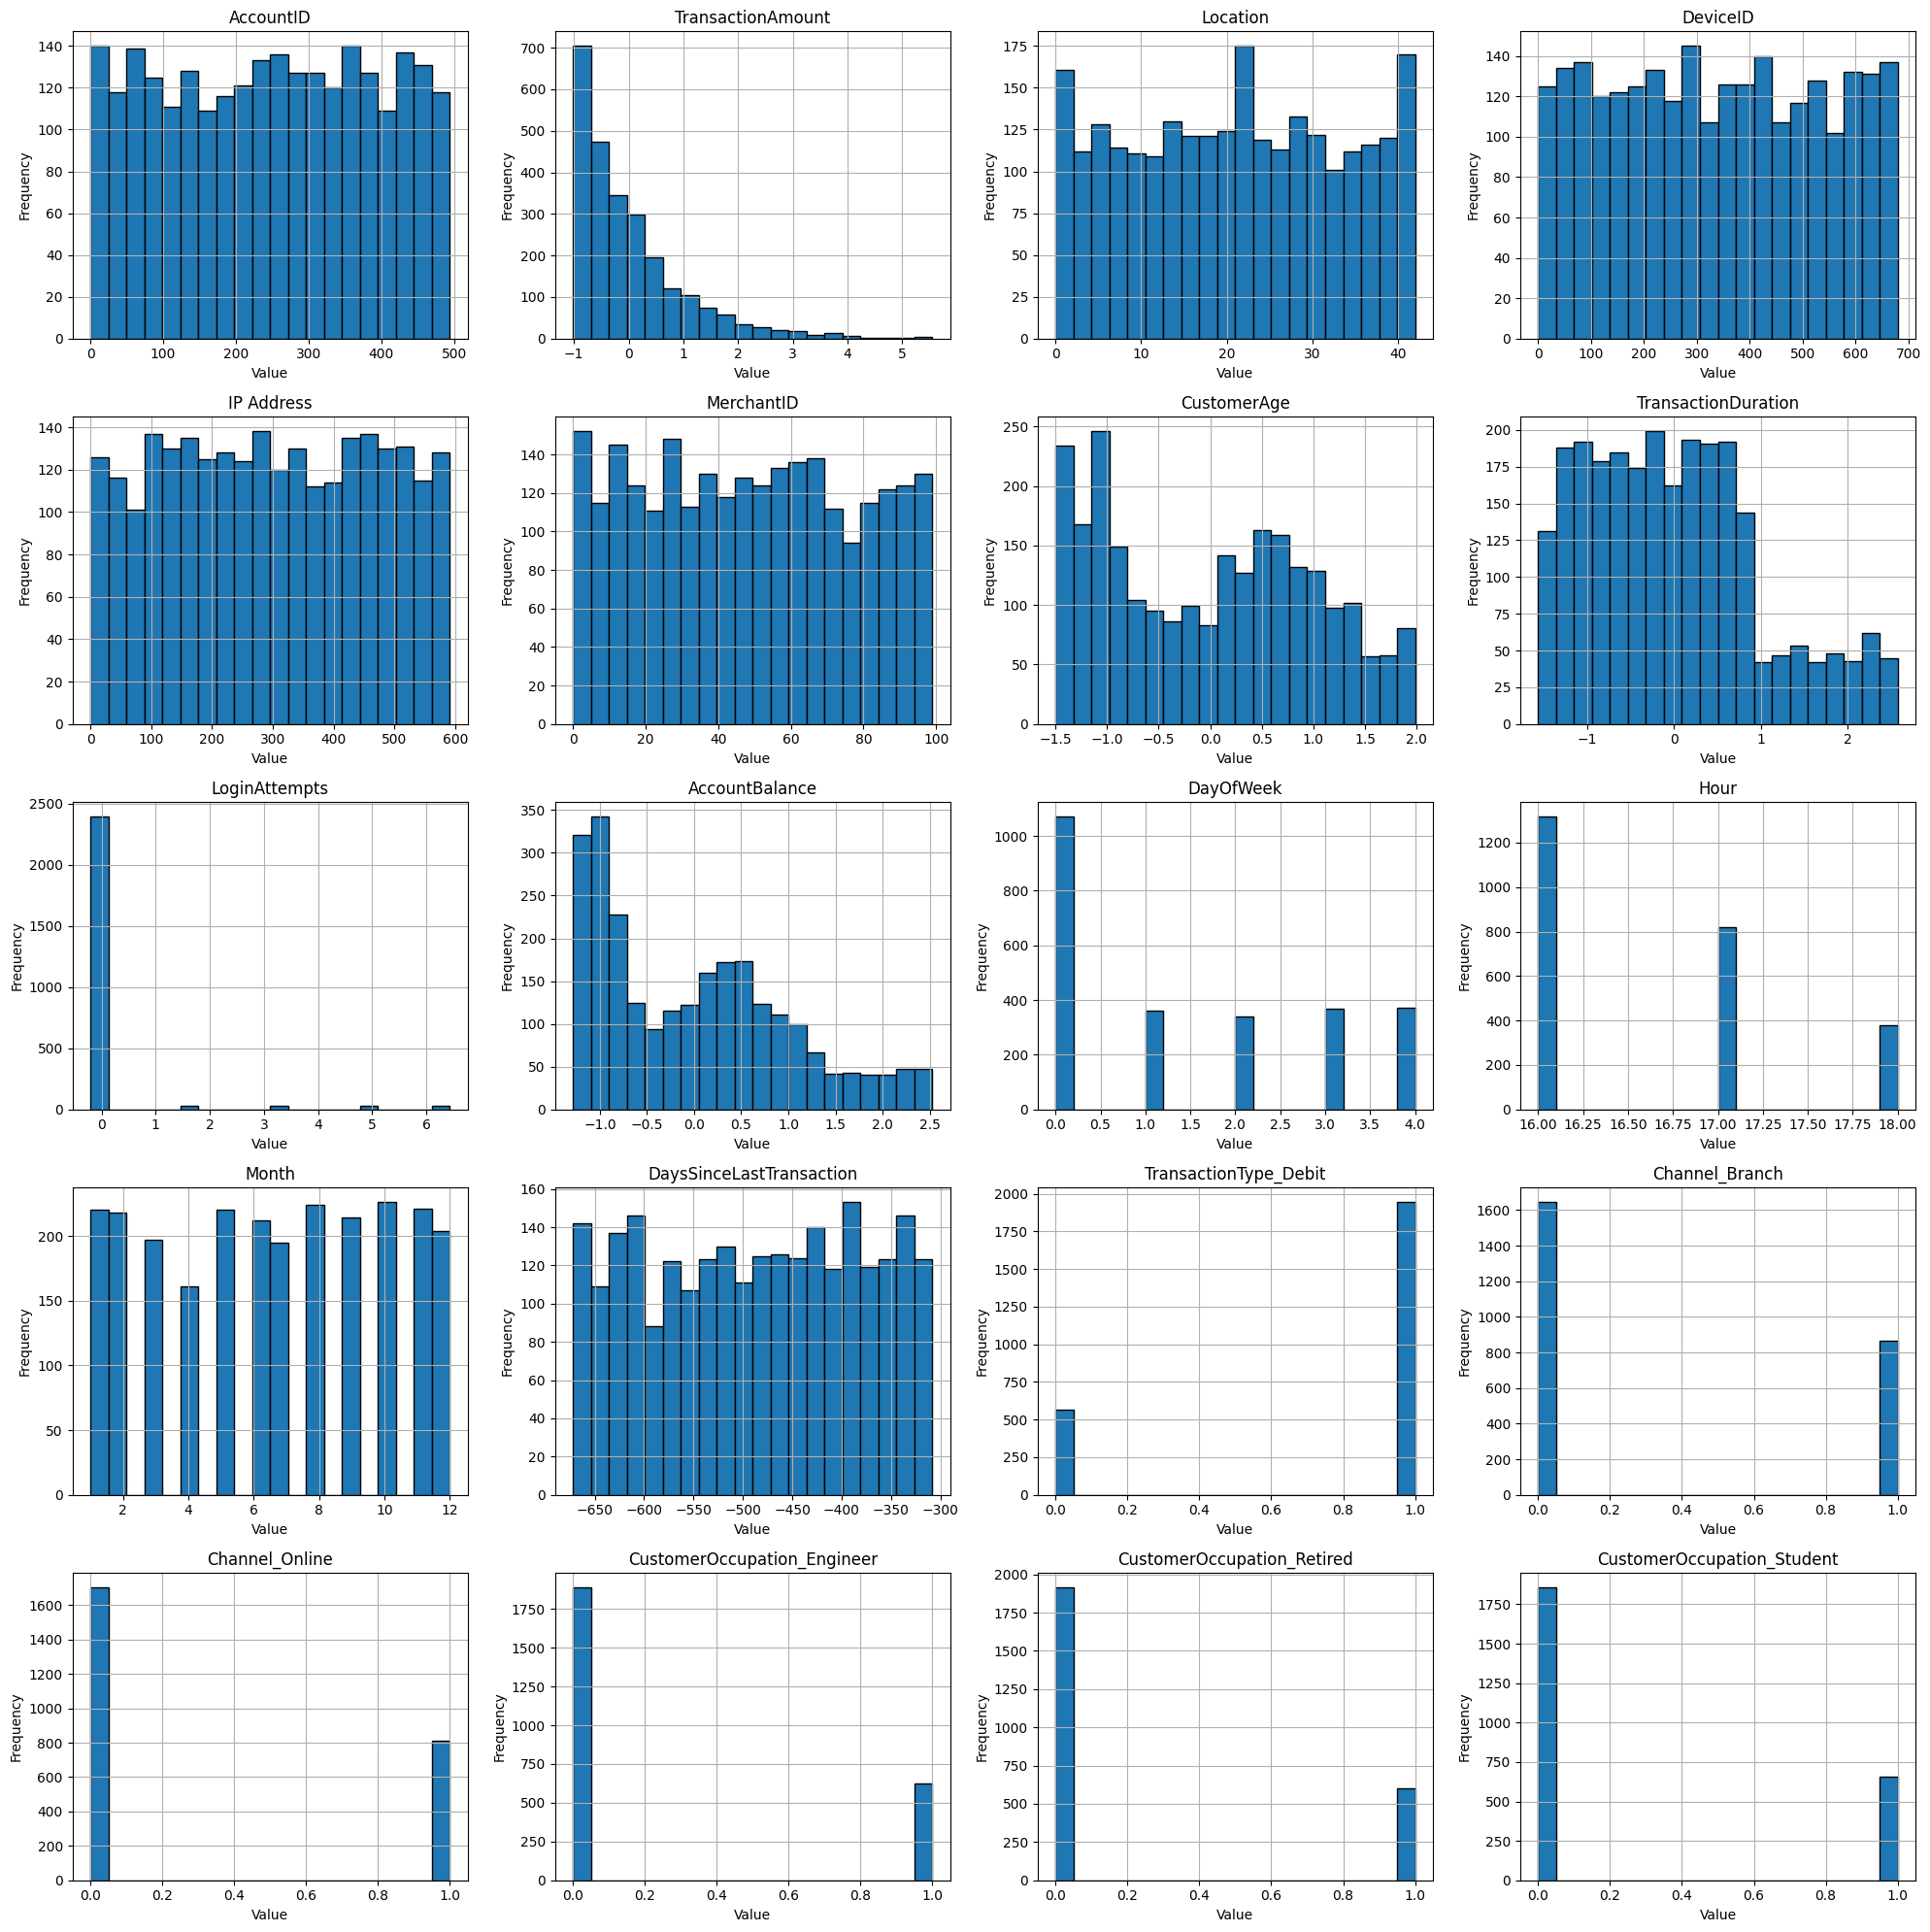

In [ ]:
# Mengubah kolom boolean menjadi integer
df_hist = df.copy()
for col in df_hist.columns:
    if df_hist[col].dtype == bool:
        df_hist[col] = df_hist[col].astype(int)

# Menghitung jumlah variabel
num_vars = df_hist.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df_hist.columns):
    df_hist[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

###Visualisasi Distribusi dan Korelasi

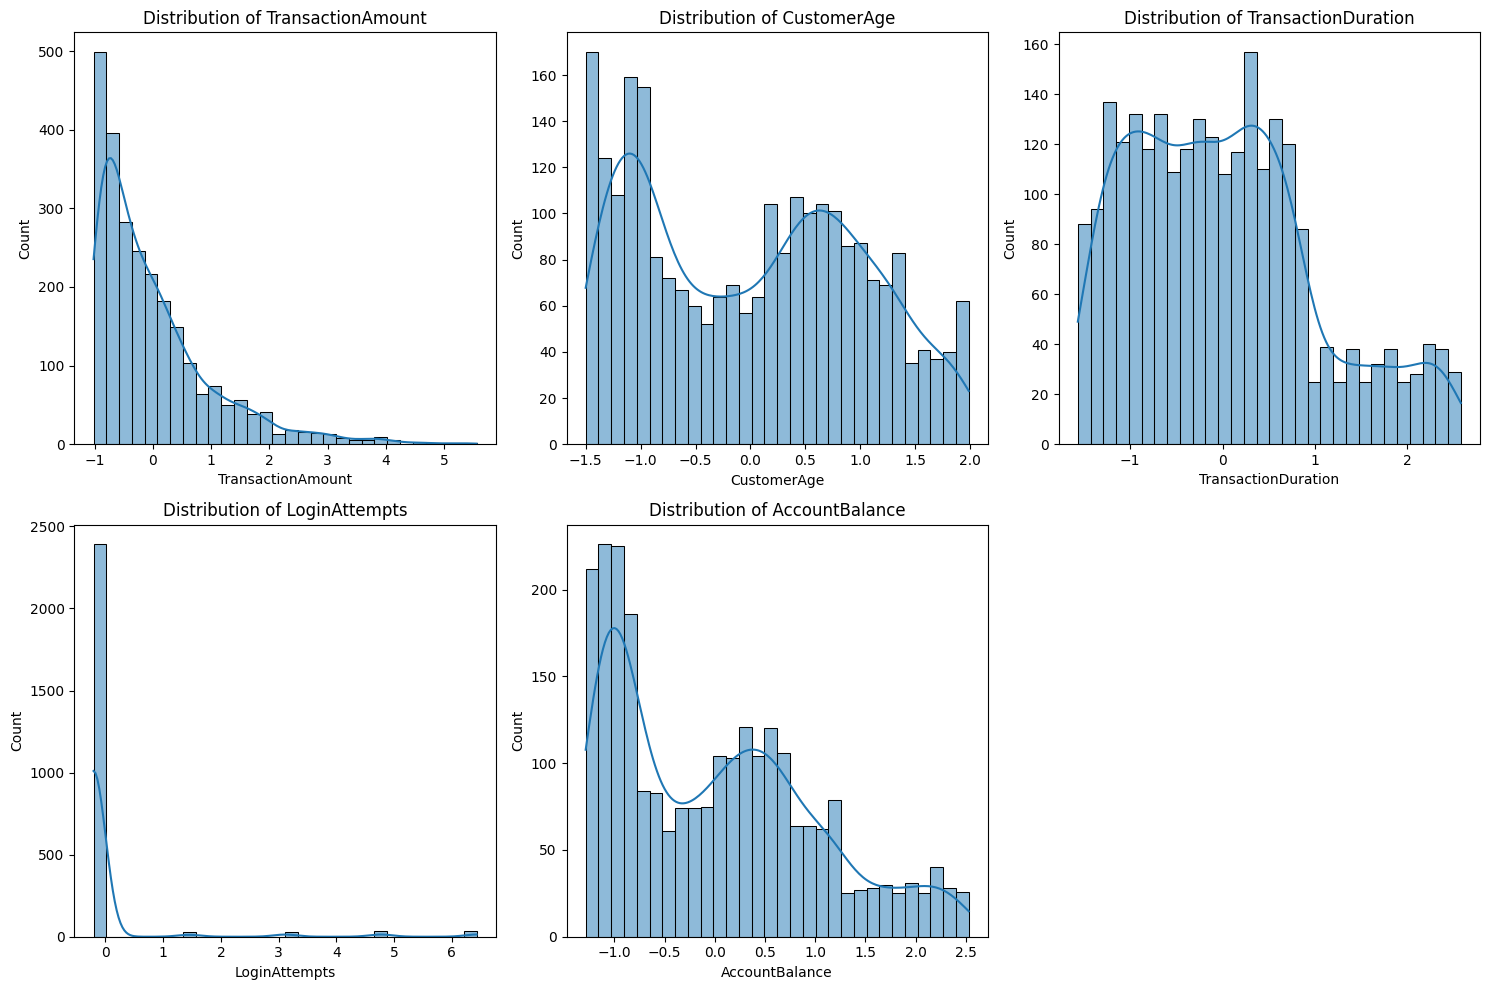

In [ ]:
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sn.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

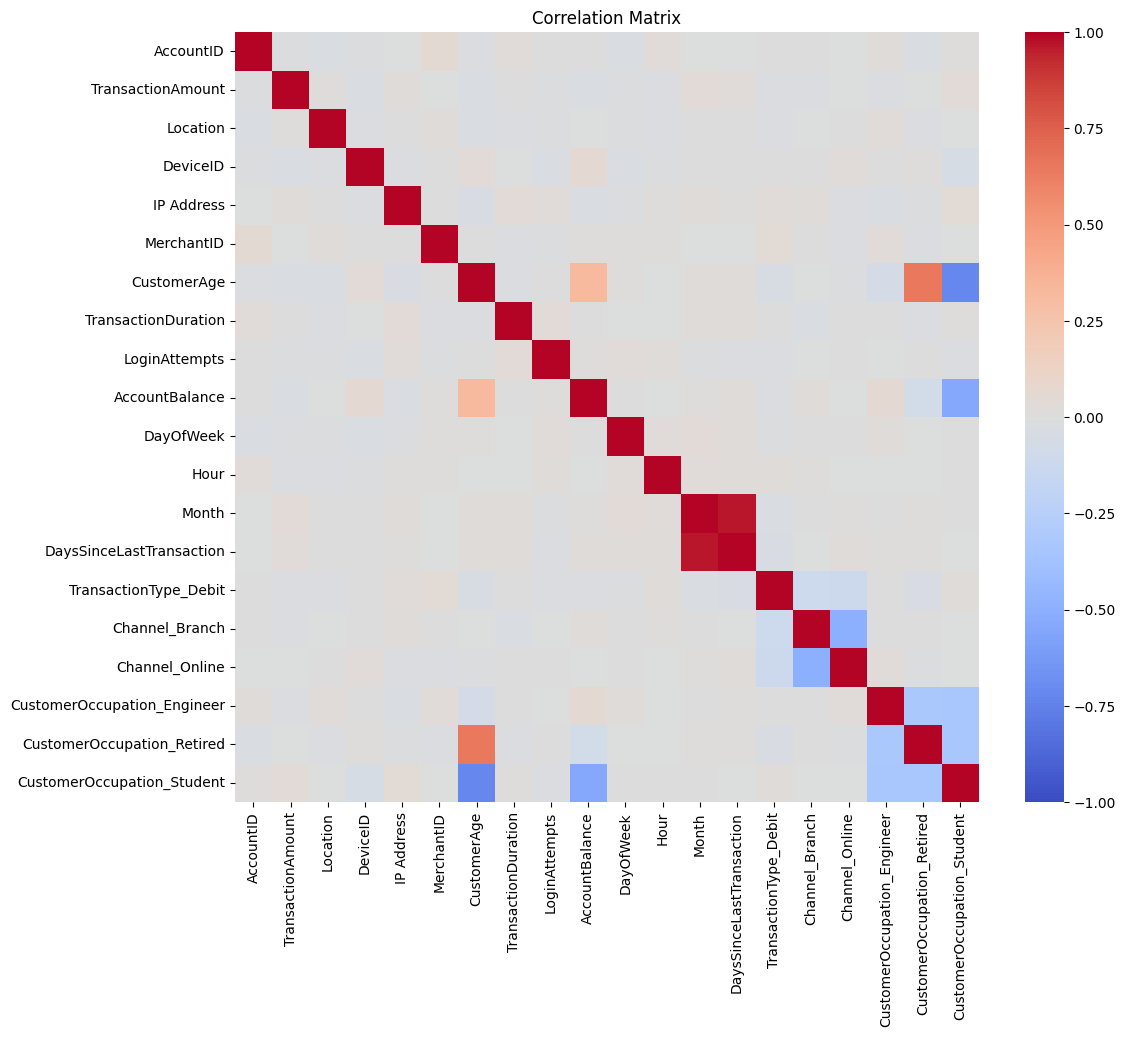

In [ ]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

sn.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.head()

,AccountID,TransactionAmount,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,DayOfWeek,Hour,Month,DaysSinceLastTransaction,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,126,-0.971275,36,365,186,14,1.423718,-0.552443,-0.206794,-0.000537,1,16,4,-573,True,False,False,False,False,False
1,450,0.269440,15,50,82,51,1.311287,0.305314,-0.206794,2.216472,1,16,6,-496,True,False,False,False,False,False
2,18,-0.586882,23,229,343,8,-1.443277,-0.909842,-0.206794,-1.023534,0,18,7,-483,True,False,True,False,False,True
3,68,-0.387456,33,182,300,1,-1.049768,-1.353017,-0.206794,0.885797,4,16,5,-549,True,False,True,False,False,True
4,406,-0.973468,1,298,501,90,-1.049768,1.120184,-0.206794,0.593589,0,17,10,-385,False,False,True,False,False,True


In [ ]:
df.describe()

,AccountID,TransactionAmount,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,DayOfWeek,Hour,Month,DaysSinceLastTransaction
count,2512.000000,2.512000e+03,2512.000000,2512.000000,2512.000000,2512.000000,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2512.000000,2512.000000,2512.00000,2512.000000
mean,246.637739,-1.414297e-16,21.032643,337.732882,297.083201,48.523885,9.900078e-18,7.637203e-17,1.527441e-16,4.985396e-17,1.448248,16.626194,6.56250,-487.857882
std,143.353390,1.000199e+00,12.253549,198.210671,169.659435,29.032470,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.511310,0.731059,3.47559,106.378910
min,0.000000,-1.018657e+00,0.000000,0.000000,0.000000,0.000000,-1.499493e+00,-1.567456e+00,-2.067936e-01,-1.285344e+00,0.000000,16.000000,1.00000,-672.000000
25%,123.000000,-7.390118e-01,11.000000,166.750000,150.000000,24.000000,-9.935526e-01,-8.097706e-01,-2.067936e-01,-9.255845e-01,0.000000,16.000000,3.00000,-581.000000
50%,250.000000,-2.961881e-01,21.000000,335.500000,294.000000,48.000000,1.832826e-02,-1.021205e-01,-2.067936e-01,-9.712227e-02,1.000000,16.000000,7.00000,-486.000000
75%,369.000000,4.006114e-01,31.000000,510.000000,447.000000,73.000000,8.053467e-01,5.912336e-01,-2.067936e-01,6.575405e-01,3.000000,17.000000,10.00000,-395.000000
max,494.000000,5.555266e+00,42.000000,680.000000,591.000000,99.000000,1.985874e+00,2.578372e+00,6.431745e+00,2.529043e+00,4.000000,18.000000,12.00000,-308.000000


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

###Pemilihan Algoritma
Karena dataset tersebut memiliki outlier pada kolom TransactionAmount dan LoginAttempts, dan tujuan saya memilih untuk tidak menghapus outlier terssebut adalah mendeteksi anomali, maka algoritma clustering yang cocok adalah DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

####Persiapan Data

In [ ]:
# Memilih fitur yang relevan untuk clustering
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionType_Debit']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

####Tuning Parameter untuk menentukan nilai eps dan min_samples

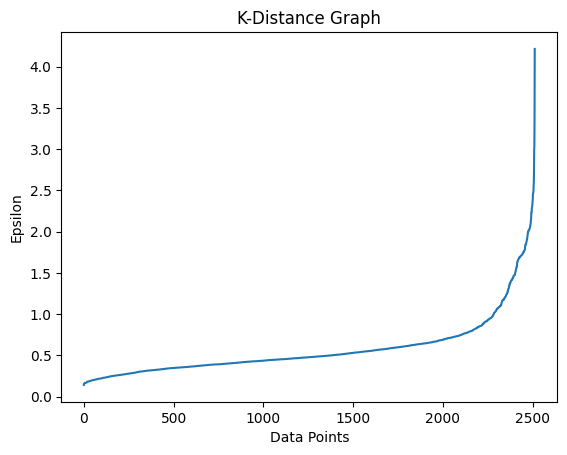

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Hitung k-distance graph untuk menentukan eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Plot k-distance graph
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.show()

Berdasarkan K-Distance Graph tersebut, saya berasumsi parameter untuk DBSCAN sebagai berikut:

Nilai eps: Grafik K-Distance menunjukkan "siku" atau titik belok yang paling jelas sekitar nilai 0.7-0.8. Ini adalah area di mana kurva mulai naik secara signifikan setelah relatif stabil. Saya akan menggunakan nilai eps = 0.7.
Nilai min_samples: Untuk nilai min_samples, prinsip umumnya adalah:
Dataset yang kecil: min_samples = 3-5
Dataset sedang: min_samples = 5-10
Dataset besar: min_samples = 10-20
Berdasarkan grafik, karena dataset memiliki sekitar 2500 data points, yang merupakan dataset ukuran sedang ke besar. Saya akan menggunakan min_samples = 10.

####Pilih Algoritma DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Buat model DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=10)

####Latih Model Clustering

In [ ]:
# Latih model
dbscan.fit(X_scaled)

# Tambahkan label cluster ke DataFrame
df['Cluster'] = dbscan.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
from sklearn.metrics import silhouette_score

# mengitung Silhouette Score
valid_clusters = df[df['Cluster'] != -1]  # mengapus noise (label -1)
silhouette_avg = silhouette_score(X_scaled[valid_clusters.index], valid_clusters['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.17922671409933688


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
from sklearn.decomposition import PCA

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)  # Pilih jumlah komponen utama
X_pca = pca.fit_transform(X_scaled)

# Latih model DBSCAN dengan data yang sudah direduksi
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
dbscan_pca.fit(X_pca)

# Tambahkan label cluster ke DataFrame
df['Cluster_PCA'] = dbscan_pca.labels_

# Evaluasi model
silhouette_avg_pca = silhouette_score(X_pca, df['Cluster_PCA'])
print(f"Silhouette Score setelah PCA: {silhouette_avg_pca}")

Silhouette Score setelah PCA: 0.5289318666937046


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

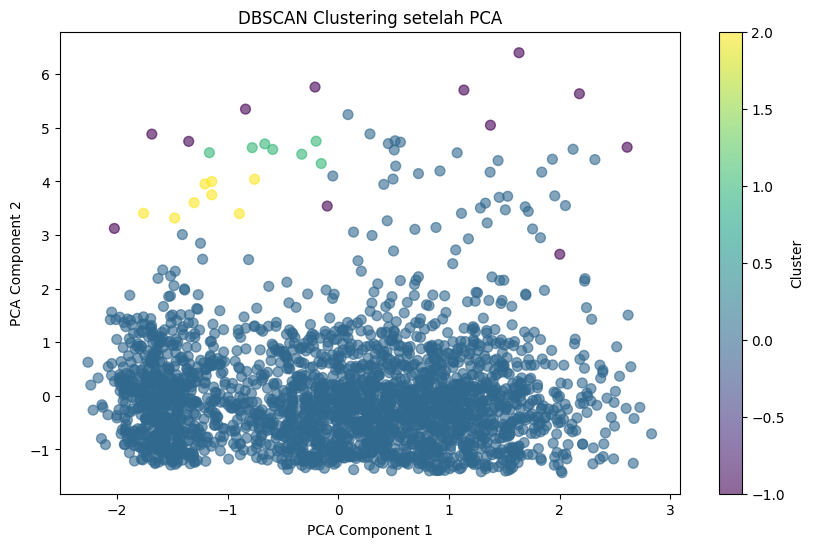

In [ ]:
# Visualisasi hasil clustering setelah PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_PCA'], cmap='viridis', s=50, alpha=0.6)
plt.title('DBSCAN Clustering setelah PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Menyimpan DataFrame asli sebelum melakukan inverse transform
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = dbscan.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Melakukan inverse transform pada data yang telah distandarisasi
features_inverse = scaler.inverse_transform(X_scaled)
df_features_inverse = pd.DataFrame(features_inverse, columns=features, index=df.index)

# Menggabungkan hasil cluster dengan data asli
df_original_with_clusters = pd.concat([df_features_inverse, df_with_clusters[['Cluster']]], axis=1)

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Analisis statistik deskriptif untuk setiap cluster
cluster_stats = df_original_with_clusters.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'median', 'std', 'min', 'max'],
    'CustomerAge': ['mean', 'median', 'std', 'min', 'max'],
    'TransactionDuration': ['mean', 'median', 'std', 'min', 'max'],
    'LoginAttempts': ['mean', 'median', 'std', 'min', 'max'],
    'AccountBalance': ['mean', 'median', 'std', 'min', 'max'],
    'TransactionType_Debit': ['mean', 'sum']
})

# Menampilkan statistik untuk setiap cluster
print(cluster_stats)

# Menghitung jumlah data di setiap cluster
cluster_counts = df_original_with_clusters['Cluster'].value_counts()
print("\nJumlah data di setiap cluster:")
print(cluster_counts)

        TransactionAmount                                         CustomerAge  \
                     mean    median       std       min       max        mean   
Cluster                                                                         
-1               0.814154  0.526696  1.437246 -1.012935  5.555266    0.103491   
 0              -0.217426 -0.403935  0.686949 -1.018657  2.532019   -0.021500   
 1              -0.453758 -0.591301  0.446441 -1.008242  0.839795    0.679377   
 2              -0.043022 -0.188339  0.762610 -1.012593  1.992737   -1.135802   
 3               2.619812  2.569807  0.155822  2.397412  2.877939   -1.250538   
 4              -0.335189 -0.550601  0.413955 -0.845405  0.407780   -0.798960   

                                                 ... LoginAttempts            \
           median       std       min       max  ...           std       min   
Cluster                                          ...                           
-1       0.130759  0.983479 -1

Analisis Karakteristik Cluster dari Model DBSCAN
1. **Cluster 1**:
  - Rata-rata TransactionAmount: -0.453758 (standarisasi)
  - Rata-rata CustomerAge: 0.679377 (standarisasi)
  - Rata-rata LoginAttempts: -0.206794 (standarisasi)
  - Rata-rata AccountBalance: 0.126825 (standarisasi)
  - TransactionType_Debit: 0.0 (tidak ada transaksi debit)
  - Jumlah Data: 191
- **Analisis**: Cluster ini terdiri dari pelanggan dengan jumlah transaksi yang relatif rendah (nilai negatif pada TransactionAmount) dan usia yang lebih tua (nilai positif pada CustomerAge). Mereka memiliki saldo akun yang cukup stabil (nilai positif pada AccountBalance) dan tidak melakukan transaksi debit. Pelanggan dalam cluster ini mungkin merupakan kelompok yang lebih konservatif dalam pengeluaran mereka, dengan kecenderungan untuk menyimpan uang daripada membelanjakannya.
2. **Cluster 2**:
  - Rata-rata TransactionAmount: -0.043022 (standarisasi)
  - Rata-rata CustomerAge: -1.135802 (standarisasi)
  - Rata-rata LoginAttempts: -0.206794 (standarisasi)
  - Rata-rata AccountBalance: -1.041691 (standarisasi)
  - TransactionType_Debit: 0.0 (tidak ada transaksi debit)
  - Jumlah Data: 115
- **Analisis**: Cluster ini mencakup pelanggan dengan jumlah transaksi yang mendekati rata-rata (nilai mendekati nol pada TransactionAmount) dan usia yang lebih muda (nilai negatif pada CustomerAge). Mereka memiliki saldo akun yang rendah (nilai negatif pada AccountBalance) dan tidak melakukan transaksi debit. Pelanggan dalam cluster ini mungkin merupakan kelompok yang lebih muda dengan pengeluaran yang terbatas dan cenderung memiliki saldo akun yang rendah.
3. **Cluster 3**:
  - Rata-rata TransactionAmount: 2.619812 (standarisasi)
  - Rata-rata CustomerAge: -1.250538 (standarisasi)
  - Rata-rata LoginAttempts: -0.206794 (standarisasi)
  - Rata-rata AccountBalance: -1.042799 (standarisasi)
  - TransactionType_Debit: 1.0 (semua transaksi debit)
  - Jumlah Data: 7
- **Analisis**: Cluster ini terdiri dari pelanggan dengan jumlah transaksi yang sangat tinggi (nilai positif tinggi pada TransactionAmount) dan usia yang lebih muda (nilai negatif pada CustomerAge). Mereka memiliki saldo akun yang rendah (nilai negatif pada AccountBalance) dan semua transaksi mereka adalah debit. Pelanggan dalam cluster ini mungkin merupakan kelompok yang sangat aktif dalam bertransaksi, tetapi dengan saldo akun yang rendah dan cenderung melakukan transaksi debit.
4. **Cluster -1 (Noise)**:
  - Rata-rata TransactionAmount: 0.814154 (standarisasi)
  - Rata-rata CustomerAge: 0.103491 (standarisasi)
  - Rata-rata LoginAttempts: Bervariasi (dari -0.- 206794 hingga 6.431745)
  - Rata-rata AccountBalance: 0.424117 (standarisasi)
  - TransactionType_Debit: 0.535448 (sekitar 53.5% transaksi debit)
  - Jumlah Data: 536
- **Analisis**: Cluster ini merupakan noise atau data yang tidak termasuk dalam cluster tertentu. Pelanggan dalam cluster ini memiliki jumlah transaksi yang bervariasi (nilai positif pada TransactionAmount) dan usia yang mendekati rata-rata (nilai mendekati nol pada CustomerAge). Mereka memiliki saldo akun yang cukup stabil (nilai positif pada AccountBalance) dan sekitar 53.5% transaksi mereka adalah debit. Cluster ini mungkin mencakup transaksi normal yang tidak menunjukkan pola tertentu.
5. **Cluster 0**:
  - Rata-rata TransactionAmount: -0.217426 (standarisasi)
  - Rata-rata CustomerAge: -0.021500 (standarisasi)
  - Rata-rata LoginAttempts: -0.206794 (standarisasi)
  - Rata-rata AccountBalance: -0.081256 (standarisasi)
  - TransactionType_Debit: 1.0 (semua transaksi debit)
  - Jumlah Data: 1650
- **Analisis**: Cluster ini mencakup pelanggan dengan jumlah transaksi yang mendekati rata-rata (nilai mendekati nol pada TransactionAmount) dan usia yang mendekati rata-rata (nilai mendekati nol pada CustomerAge). Mereka memiliki saldo akun yang mendekati rata-rata (nilai mendekati nol pada AccountBalance) dan semua transaksi mereka adalah debit. Pelanggan dalam cluster ini mungkin merupakan kelompok yang stabil dalam bertransaksi dan cenderung melakukan transaksi debit.
6. **Cluster 4**:
  - Rata-rata TransactionAmount: -0.335189 (standarisasi)
  - Rata-rata CustomerAge: -0.798960 (standarisasi)
  - Rata-rata LoginAttempts: -0.206794 (standarisasi)
  - Rata-rata AccountBalance: 0.739730 (standarisasi)
  - TransactionType_Debit: 0.0 (tidak ada transaksi debit)
  - Jumlah Data: 13
- **Analisis**: Cluster ini terdiri dari pelanggan dengan jumlah transaksi yang relatif rendah (nilai negatif pada TransactionAmount) dan usia yang lebih muda (nilai negatif pada CustomerAge). Mereka memiliki saldo akun yang tinggi (nilai positif pada AccountBalance) dan tidak melakukan transaksi debit. Pelanggan dalam cluster ini mungkin merupakan kelompok yang lebih muda dengan saldo akun yang tinggi tetapi cenderung tidak aktif dalam bertransaksi.
####**Kesimpulan**:
  - Cluster 1: Pelanggan dengan transaksi rendah, usia -lebih tua, dan saldo akun stabil.
  - Cluster 2: Pelanggan dengan transaksi mendekati rata-rata, usia lebih muda, dan saldo akun rendah.
  - Cluster 3: Pelanggan dengan transaksi sangat tinggi, usia lebih muda, dan saldo akun rendah.
  - Cluster -1 (Noise): Transaksi normal tanpa pola tertentu.
  - Cluster 0: Pelanggan dengan transaksi stabil dan semua transaksi adalah debit.
  - Cluster 4: Pelanggan dengan transaksi rendah, usia lebih muda, dan saldo akun tinggi.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan DataFrame ke file CSV
df.to_csv('hasil_clustering.csv', index=False)